In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats
from scipy.stats import beta

In [2]:

# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'



In [3]:
dt = 0.001
t_end=1
len_t = int(t_end/dt)
# tt_end=1.5
# len_tt = int(tt_end/dt)
print (len_t)
# p = 1
# # h=1
# a=3
# u=0.0001
# k=3

1000


140.0
1001


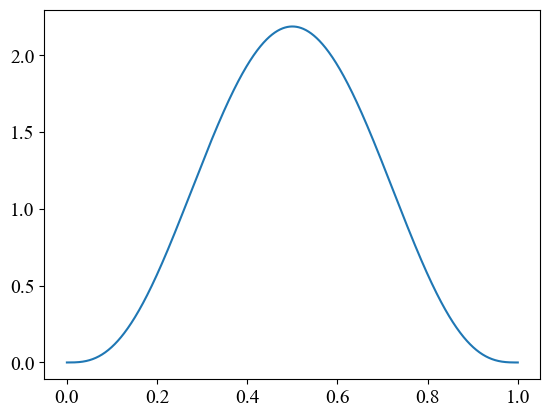

In [4]:
# h0_list = [0.61]
t3_list=[0]

# h0 = 0

a1 = 4
b1 = 4
t3_list = np.linspace(0, 1, len_t+1) #x軸
k0_list = 0.000001+beta.pdf(t3_list, a1, b1)      #y軸
z=math.factorial(a1+b1-1)/(math.factorial(a1-1)*math.factorial(b1-1))

plt.plot(t3_list, k0_list)
plt.savefig("k.png")
print(z)
print(len(k0_list))


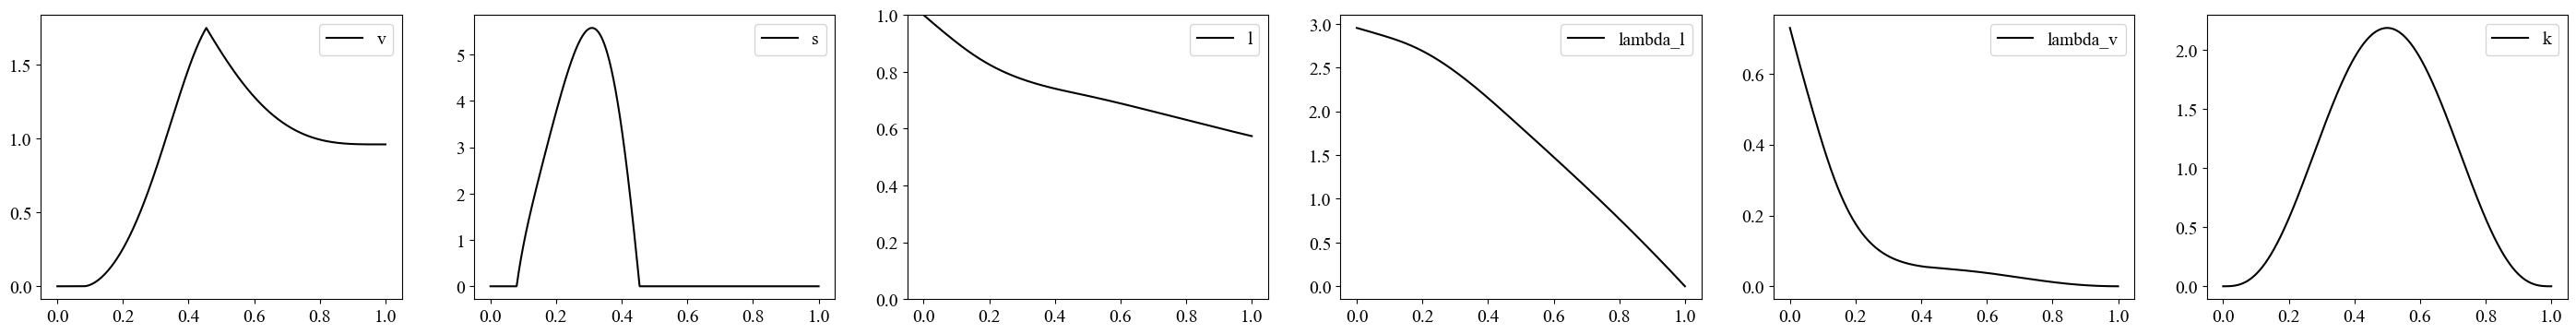

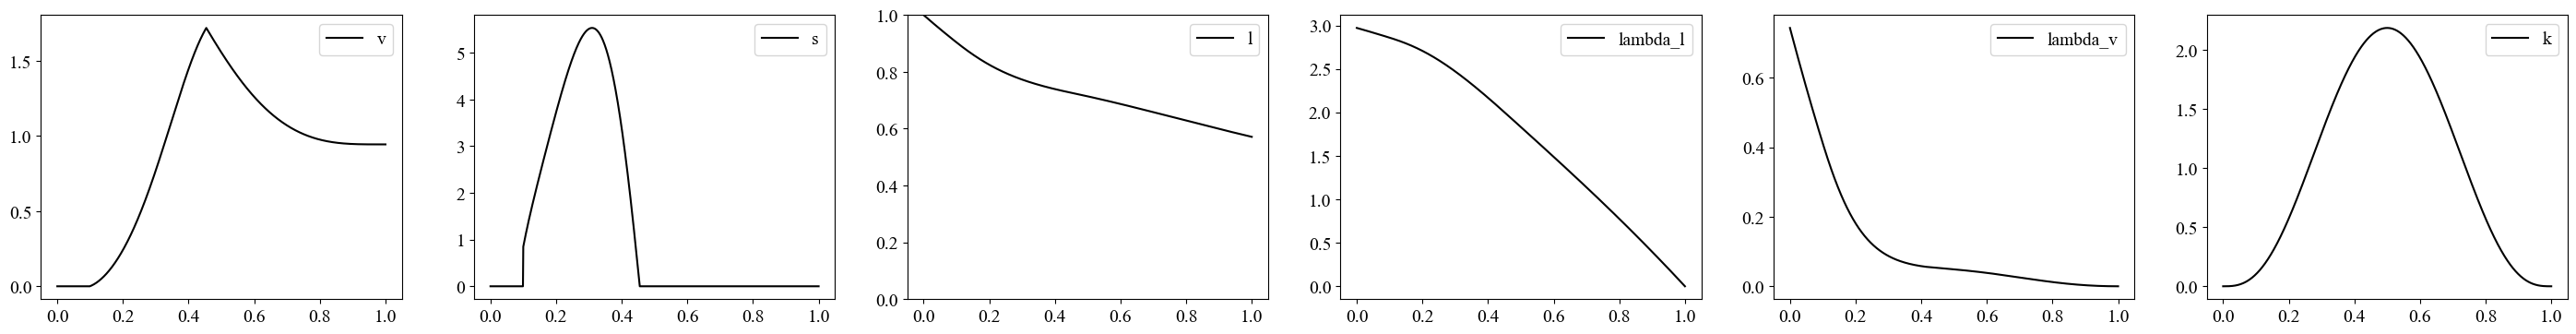

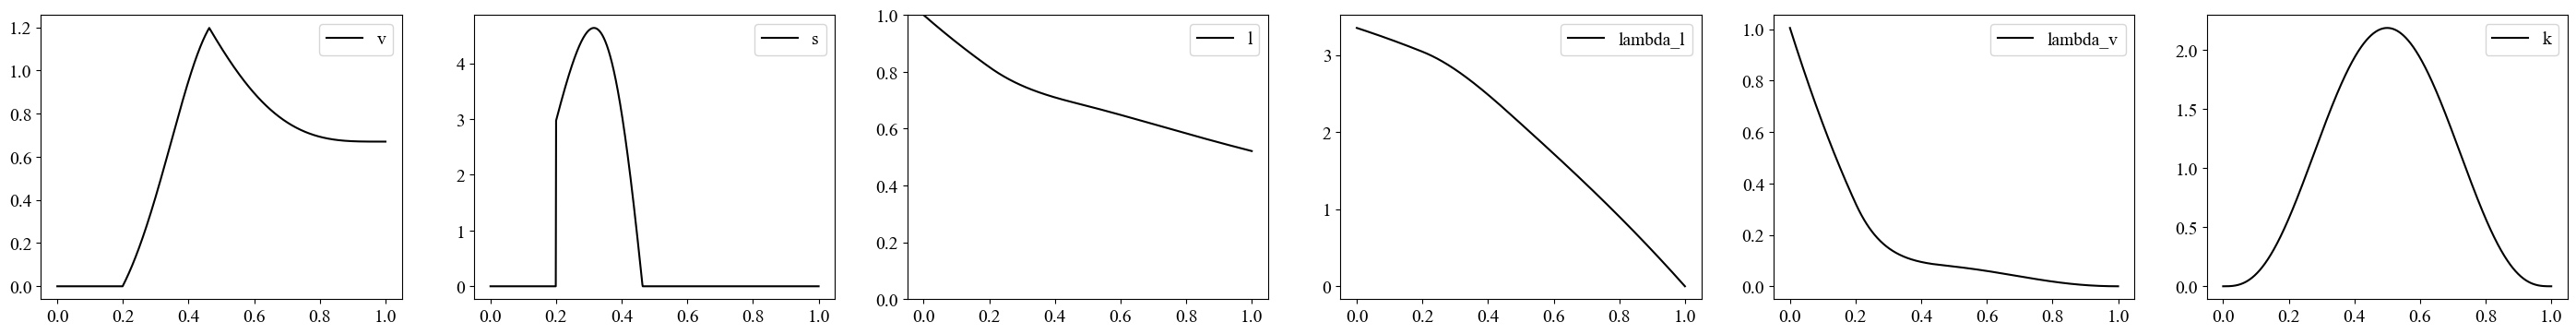

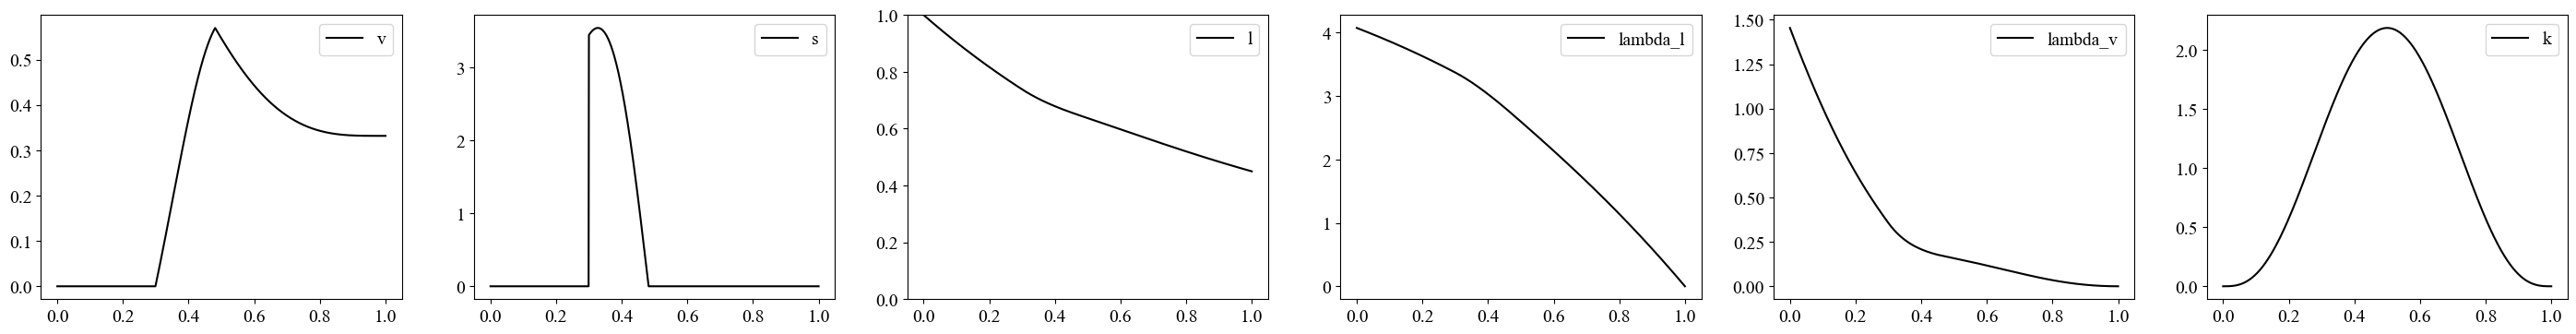

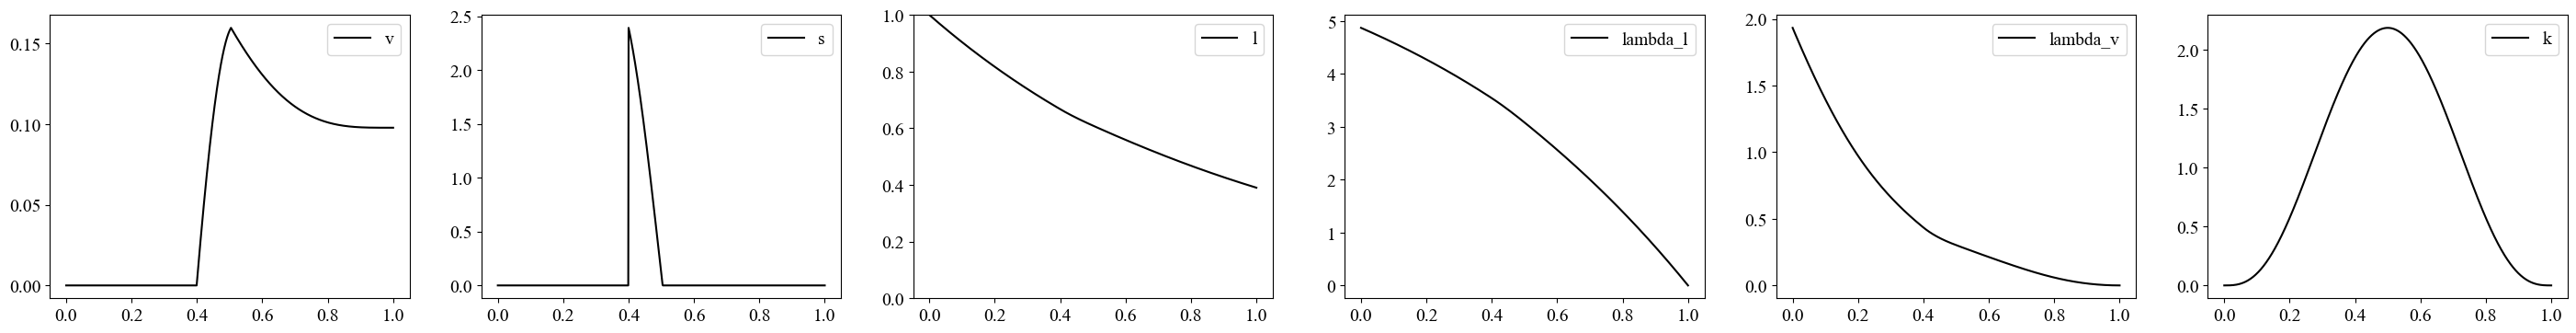

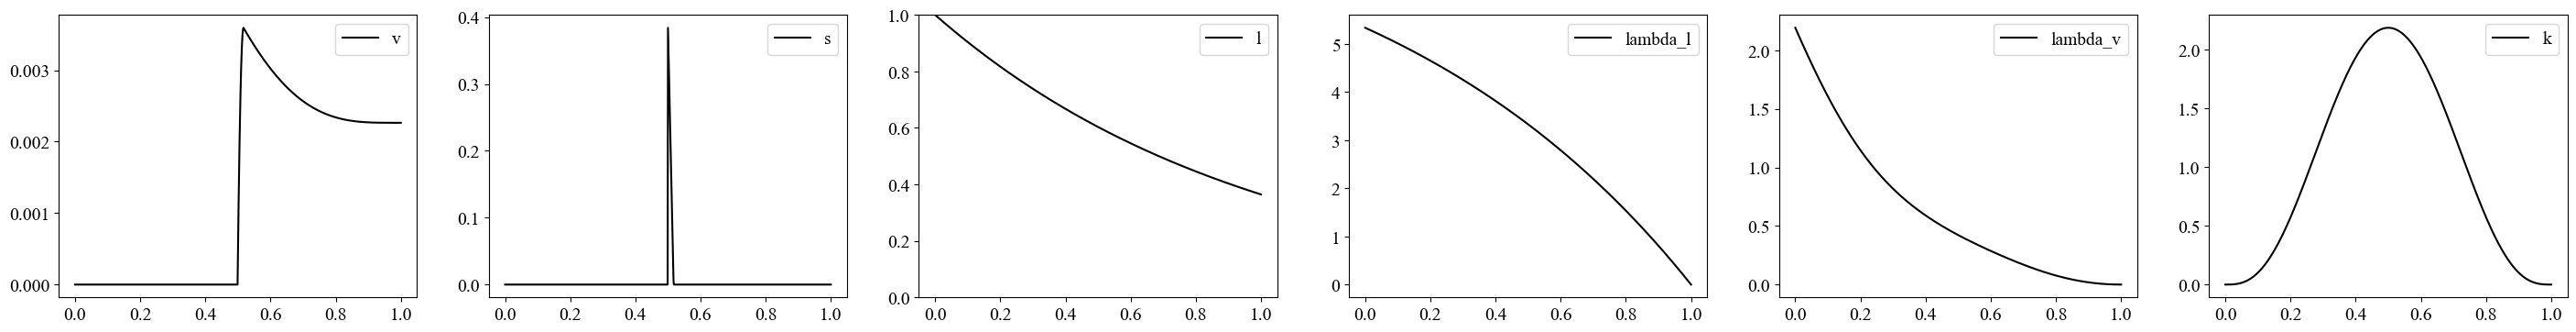

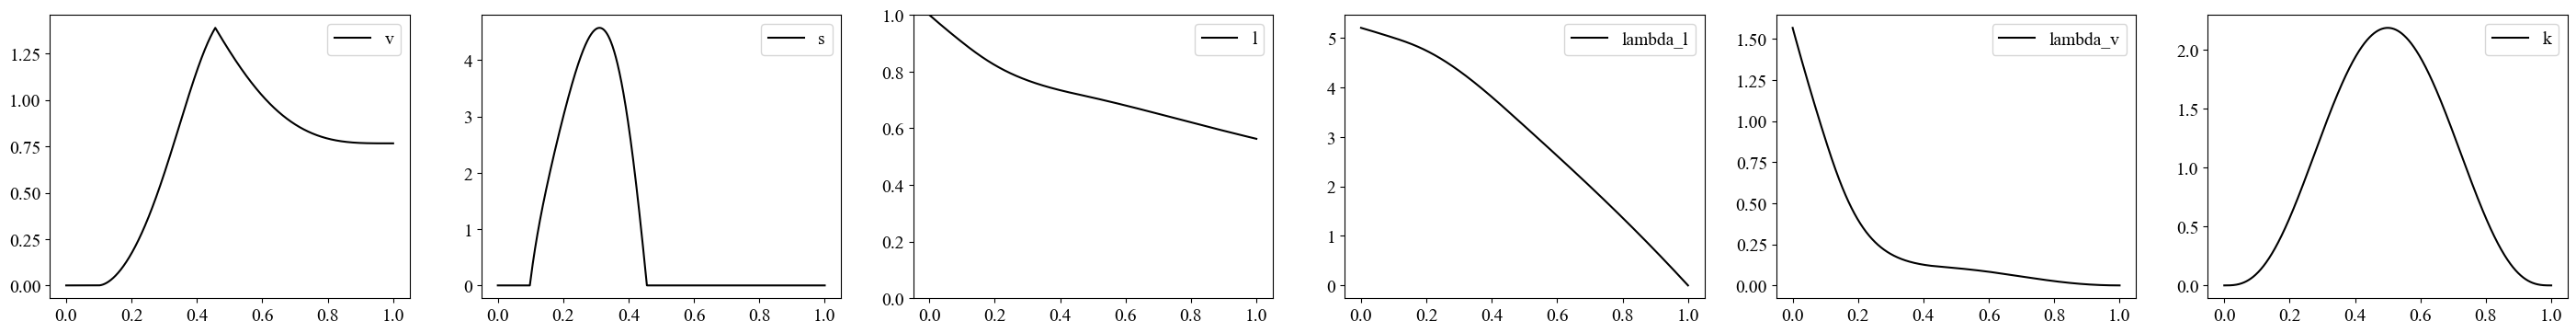

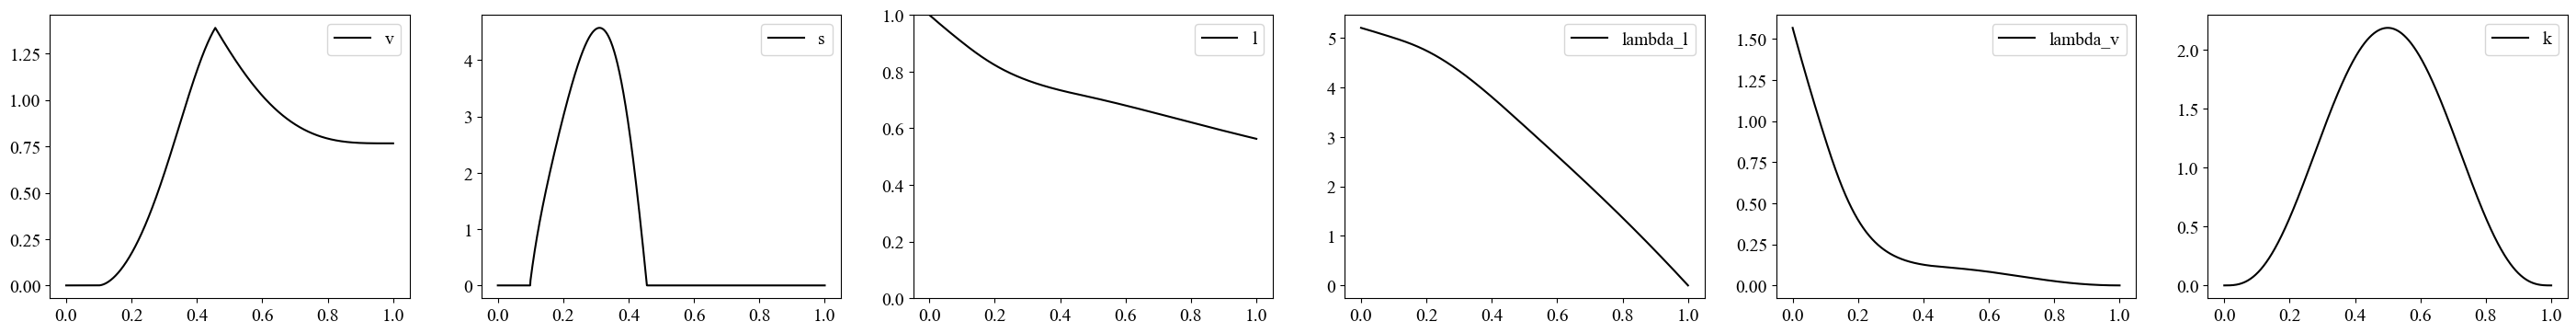

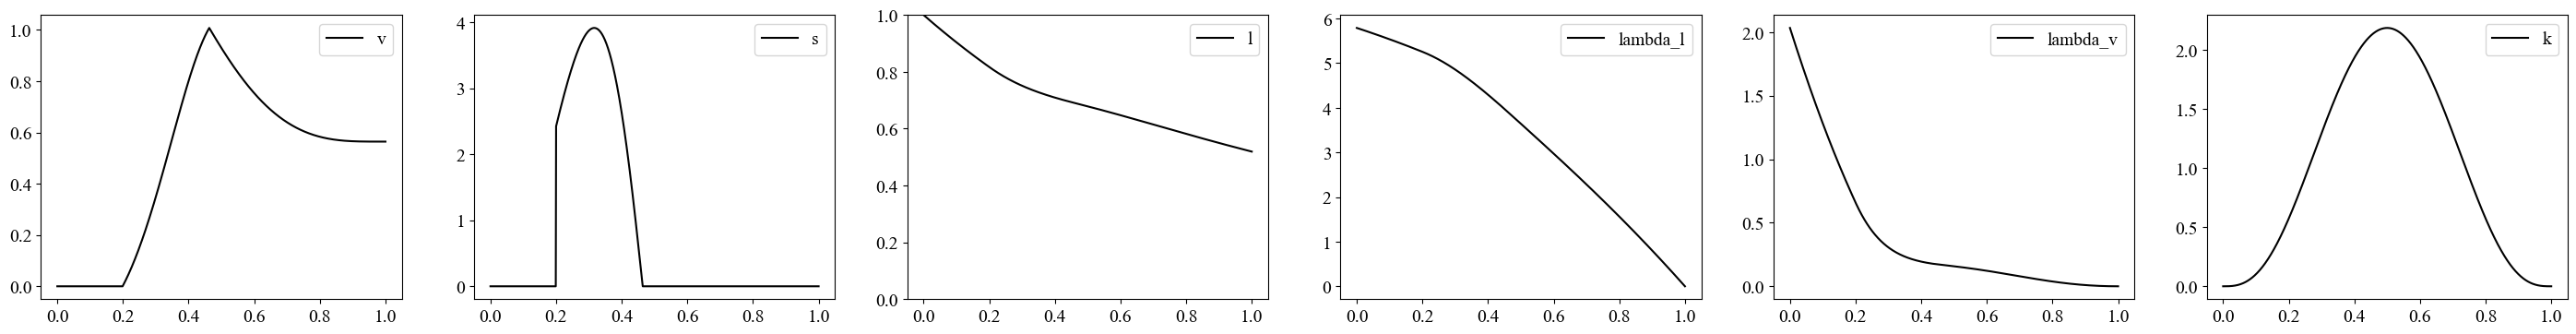

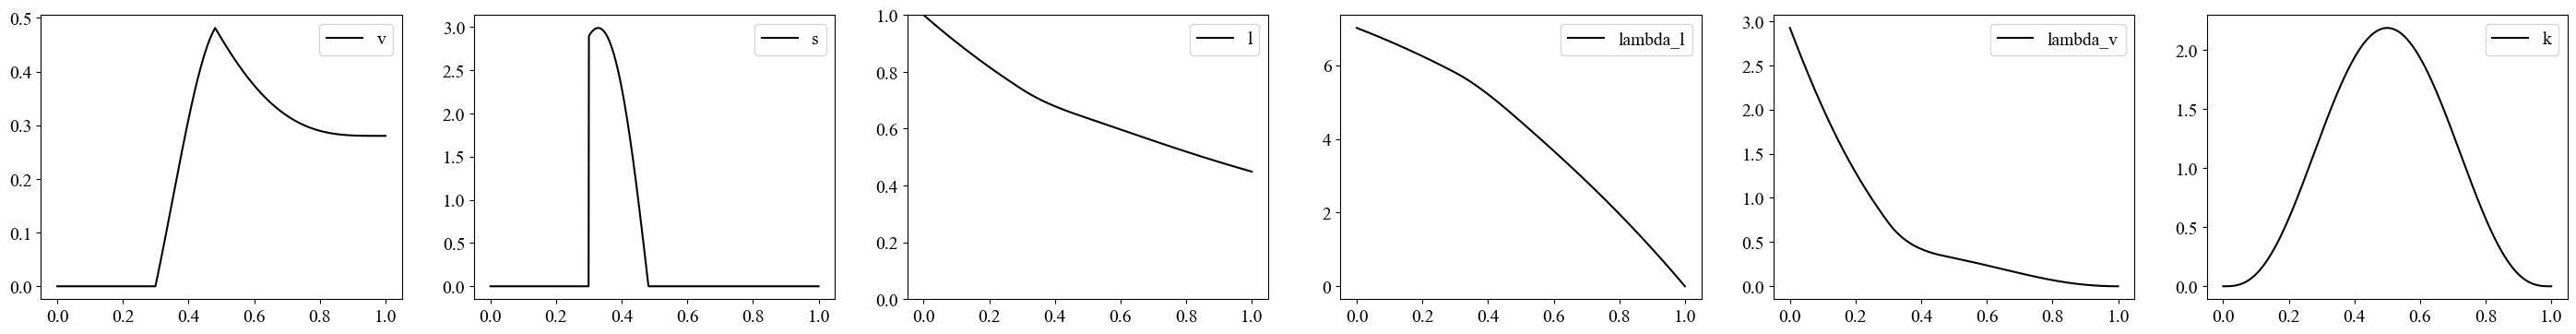

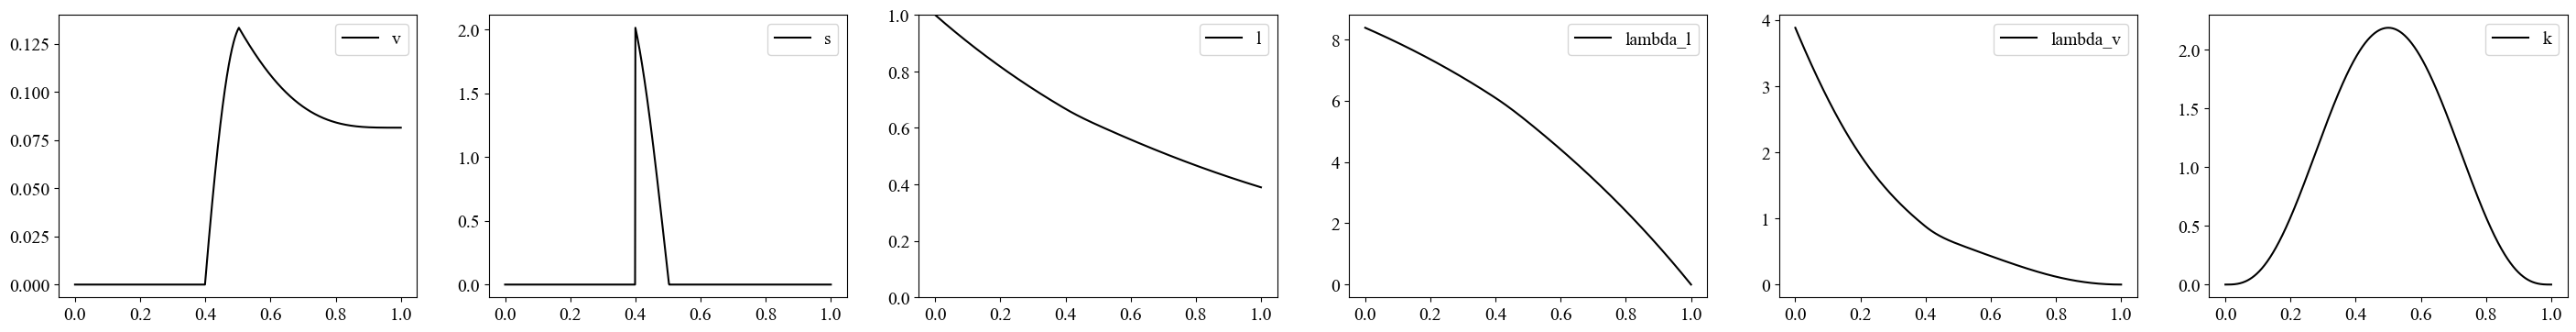

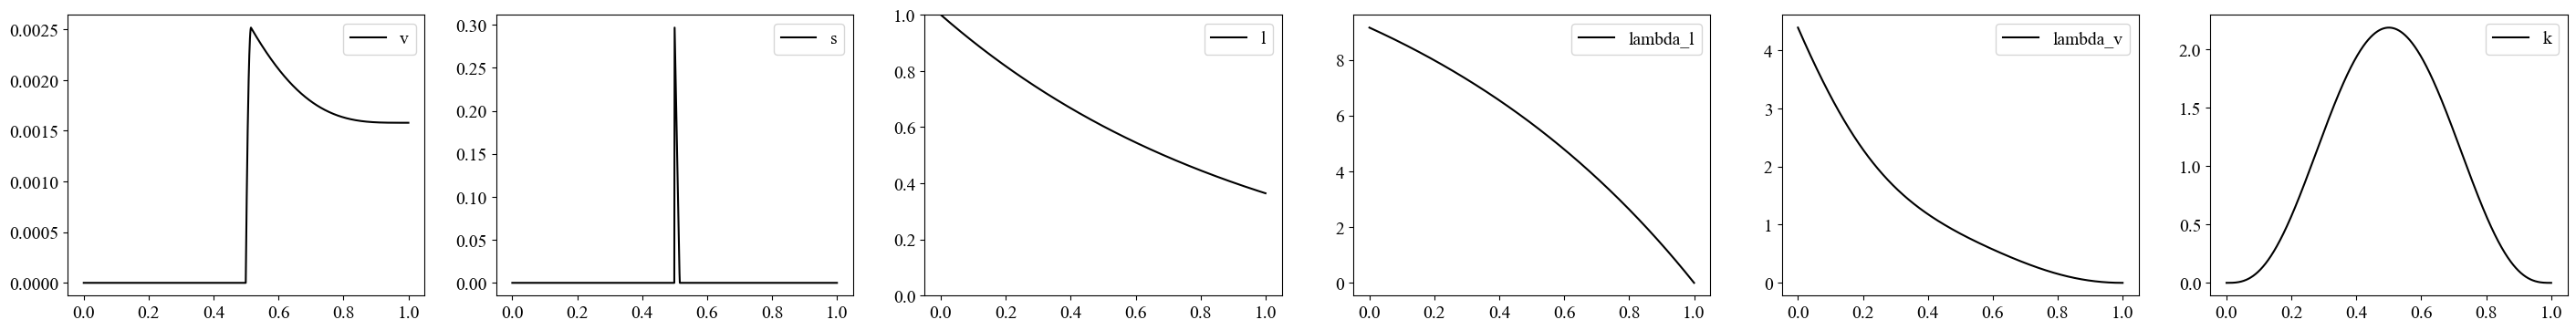

In [9]:
p=1
h=1
u=0.01
a_list=[1.2, 1.4]
len_a=len(a_list)
# k=2
#Caliculate V and s
#initial value
sa_list=[]
t2_t_list=[]
l_t2_list=[]
lamv_t2_list=[]
# l0_list=[0.1, 1]
# len_l0=len(l0_list)
t1_t_list=[0, 0.1, 0.2, 0.3, 0.4, 0.5]
len_t1=len(t1_t_list)

# print (len_t1)

for m in range(len_a):
    a=a_list[m]
    for j in range(len_t1):
        # print(j)
        t1 = t1_t_list[j]
        t2=100000
        # print(t1)
        # lam = 1/(b*h)

        #list
        # s_list =[s]
        # lam_list = [lam]
        s_list = [0]
        t_list = [0]
        v_list = [0]


        for i in range(len_t):

            t = dt*(i + 1)
            t_list.append(t)
            # if i<=len_t:
            #     h = h0_list[i]
            # else:
            #     h=1
            k = k0_list[i+1]
            v = v_list[-1]

            kata1 = h/(2*(1+a*v)*(k+u))
            kata2 = -p+k*v
            kata3 = u+(h/(1+a*v))
            kata4 = pow(1+a*v, 2)/(h*a)
            kata5 = k+u+(h/(1+a*v))
            kata6 = (k+u)/h
            kata7 = z*(((a1-1)*pow(t,a1-2)*pow(1-t,b1-1))-((b1-1)*pow(t,a1-1)*pow(1-t,b1-2)))
            dv = kata1*(kata2+kata3*kata4*kata5+kata4*kata6*kata7)
            v1 = v + dv*dt
            s = dv - k*v1
            if s <= 0:
                if i < t2:
                    t2=i
                s_list.append(0)
                v1 = v-k*v*dt
                v_list.append(v1)
            elif t<t1:
                s_list.append(0)
                v_list.append(0)
            elif i==len_t-1:
                s_list.append(0)
                v1 = v-k*v*dt
                v_list.append(v1)
            else:
                s_list.append(s)
                v_list.append(v1)

            # l_list.append(l1)
            
        # print(s_list)
        # print(v_list)

        # print(len(s_list))
        # print(len(v_list))
            
        # print(len(v_list))
        # print(len(tt_list))
        # print(tt_list)

        l = 1
        l_list = [l]
        t1_list = [0]

        for i in range(len_t):
            t = dt*(i+1)
            t1_list.append(t)
            
            # if t<t1:
            #     l1=0
            # elif t==t1:
            #     l1=1
            # else:
            #     l = l_list[i]
            #     h = h0_list[i]
            #     v = v_list[i]
            #     l1= l-(u+(h/(1+a*v)))*l*dt
            
            l = l_list[i]
            k = k0_list[i]
            v = v_list[i]
            l1= l-(u+(h/(1+a*v)))*l*dt
            l_list.append(l1)

        lam_l = 0
        lam_v = 0
        lam_l_list=[lam_l]
        lam_v_list=[lam_v]
        t2_list = [t_end]

        for i in range(len_t):
            t = dt*(len_t-(i+1))
            t2_list.append(t)

            k = k0_list[len_t-(i+1)]
            v = v_list[len_t-(i+1)]
            l = l_list[len_t-(i+1)]
            lam_l = lam_l_list[i]
            lam_v = lam_v_list[i]

            # lam_l1=lam_l-((p-s)-lam_l*(u+(h/(1+a*v))))*dt
            # lam_v1=lam_v-(lam_l*h*a/((1+a*v)*(1+a*v))-lam_v*k)*dt
            lam_l1=lam_l-(-(p-s)+lam_l*(u+(h/(1+a*v))))*dt
            lam_v1=lam_v-(-(lam_l*l*h*a)/((1+a*v)**2)+lam_v*k)*dt

            lam_l_list.append(lam_l1)
            lam_v_list.append(lam_v1)


        # # # print(len(s_list))
        # # # print(len(lam_v_list))

        #Lとlamvの差
        sa=round(l_list[t2]-lam_v_list[len_t-t2], 3)
        l_t2=round(l_list[t2],3)
        lam_t2=round(lam_v_list[len_t-t2],3)
        # print(t2)
        # print(lam_v_list)
        # print(l_list[t2], lam_v_list[len_t-t2])
        # print(sa)
        sa_list.append(sa)
        t2_t_list.append(t2*0.01)
        l_t2_list.append(l_t2)
        lamv_t2_list.append(lam_t2)
        # print(lam_v_list)
        

        fig = plt.figure(figsize=(1.414*25, 4))

        ax1 = fig.add_subplot(1, 6, 1) #1行4列の１番目
        ax1.plot(t_list, v_list, color = "black", label="v")
        # ax1.set_ylim([0,1.2])
        ax1.legend()

        ax2 = fig.add_subplot(1, 6, 2) #1行4列の１番目
        ax2.plot(t_list, s_list, color = "black", label="s")
        #ax1.set_ylim([0,1])
        ax2.legend()

        ax3 = fig.add_subplot(1, 6, 3) #1行4列の１番目
        ax3.plot(t_list, l_list, color = "black", label="l")
        ax3.set_ylim([0,1])
        ax3.legend()

        ax4 = fig.add_subplot(1, 6, 4) #1行4列の１番目
        ax4.plot(t2_list, lam_l_list, color = "black", label="lambda_l")
        # ax4.set_ylim([0,1])
        ax4.legend()

        ax5 = fig.add_subplot(1, 6, 5) #1行4列の１番目
        ax5.plot(t2_list, lam_v_list, color = "black", label="lambda_v")
        # ax5.set_ylim([0,1])
        ax5.legend()

        ax6 = fig.add_subplot(1, 6, 6) #1行4列の１番目
        ax6.plot(t3_list, k0_list, color = "black", label="k")
        # ax6.set_ylim([0,1])
        ax6.legend()
        
        figname="a="+str(a)+",t1="+str(t1)+".png"
        plt.savefig(figname)

    # print(t2_t_list,l_t2_list,lamv_t2_list,sa_list)
    data = pd.DataFrame()
    data=pd.DataFrame([t1_t_list, t2_t_list,l_t2_list,lamv_t2_list,sa_list])
    data = data.transpose()
    # print(data)
    dataname="a="+str(a)+".csv"
    data.to_csv(dataname)

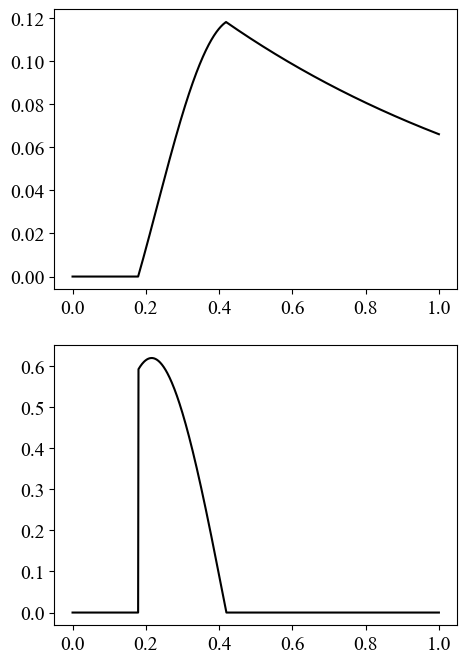

In [15]:
fig = plt.figure(figsize=(1.3*4, 8))

ax1 = fig.add_subplot(2, 1, 1) #1行4列の１番目
ax1.plot(t_list, v_list, color = "black", label="v")
# ax1.set_ylim([0,1.2])
# ax1.legend()

ax2 = fig.add_subplot(2, 1, 2) #1行4列の１番目
ax2.plot(t_list, s_list, color = "black", label="s")
#ax1.set_ylim([0,1])
# ax2.legend()
plt.savefig("fig1.png")

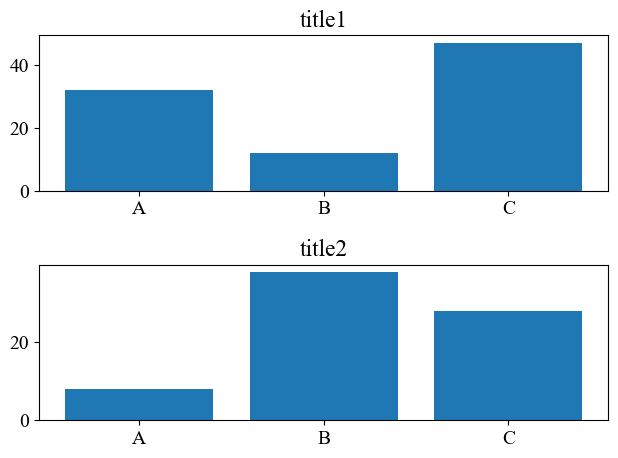

In [16]:
x1, y1 = range(0, 3), [32, 12, 47]
x2, y2 = range(0, 3), [8, 38, 28]
label = ["A", "B", "C"]
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)   #２行１列の１番目
ax1.bar(x1, y1, tick_label=label)
ax1.set_title("title1")

ax2 = fig.add_subplot(2, 1, 2)   #２行１列の２番目
ax2.bar(x2, y2, tick_label=label)
ax2.set_title("title2")

plt.tight_layout()
plt.show()

In [6]:
# # #Caliculate L(Vと要素数がずれている可能性あり)
# l = 1

# l_list = [l]
# t_list = [0]

# for i in range(len_t-1):
#     t = dt*(i+1)
#     t_list.append(t)
    
#     l = l_list[i]
#     h = h0_list[i]
#     v = v_list[i]
#     l1= l-(u+(h/(1+a*v)))*l*dt
    
#     l_list.append(l1)
    
# # print(l_list)

In [7]:
# fig = plt.figure(figsize=(1.414*25, 4))

# ax1 = fig.add_subplot(1, 6, 1) #1行4列の１番目
# ax1.plot(t_list, v_list, color = "black", label="v")
# # ax1.set_ylim([0,1.2])
# ax1.legend()

# ax2 = fig.add_subplot(1, 6, 2) #1行4列の１番目
# ax2.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 6, 3) #1行4列の１番目
# ax3.plot(t_list, l_list, color = "black", label="l")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 6, 4) #1行4列の１番目
# ax4.plot(t2_list, lam_l_list, color = "black", label="lambda_l")
# # ax4.set_ylim([0,1])
# ax4.legend()

# ax5 = fig.add_subplot(1, 6, 5) #1行4列の１番目
# ax5.plot(t2_list, lam_v_list, color = "black", label="lambda_v")
# ax5.set_ylim([0,1])
# ax5.legend()

# ax6 = fig.add_subplot(1, 6, 6) #1行4列の１番目
# ax6.plot(t3_list, h0_list, color = "black", label="h")
# # ax6.set_ylim([0,1])
# ax6.legend()
# plt.savefig("k=3,t1=0.30.png")

In [8]:
# fig = plt.figure(figsize=(1.414*20, 4))

# ax1 = fig.add_subplot(1, 4, 1)   #1行4列の１番目
# ax1.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax1.legend()

# ax2 = fig.add_subplot(1, 4, 2)   #１行4列の２番目
# ax2.plot(t_list, lam_list, color = "black", label="lambda")
# #ax2.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 4, 3)   #1行4列の3番目
# ax3.plot(tt_list, l_list, color = "black", label="L")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 4, 4)   #１行4列の4番目
# ax4.plot(tt_list, v_list, color = "black", label="V")
# ax4.set_ylim([0,1])
# ax4.legend()

# plt.savefig("slamLV.png")